In [2]:
from scipy import optimize
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

### Упражнение 1

Асимптота х = -1.9999999999999651

Локальный минимум: (0.6790, 0.9743)

Локальный максимум: (-4.1854, -8.3946)

Корни второй производной:
1) 0
2) 0.397976897640670
3) -0.650070883541892 - 0.88805735130107*I
4) -0.650070883541892 + 0.88805735130107*I
5) 0.151082434721557 - 2.2261996770367*I
6) 0.151082434721557 + 2.2261996770367*I

Точки перегиба: 
1) x = 0.0000, y = 1.0000
2) x = 0.3980, y = 0.9863


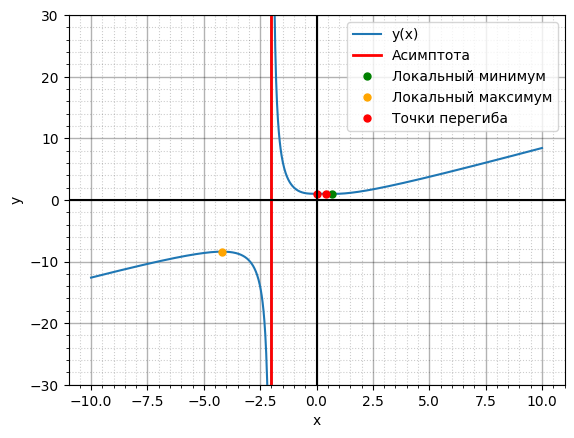

In [97]:
x = np.linspace(-10, 10, 1000)
y = lambda x: (x**4 + 2*x**2 + x + 2) / (x**3 + 2*x**2 + x + 2)

plt.plot(x, y(x), label='y(x)')

numer = lambda x: (x**4 + 2*x**2 + x + 2)
denom = lambda x: (x**3 + 2*x**2 + x + 2)

# Поиск корней
root = optimize.brentq(denom, -2.5, 0) 
plt.axvline(x=root, c='r', ls="-", lw=2, label='Асимптота')
print(f"Асимптота х = {root}")

# Поиск локального минимума
minimum = optimize.fmin(y, -1, full_output=True, disp=False)
plt.plot(minimum[0][0], minimum[1], 'go', label='Локальный минимум', ms=5)
print(f"\nЛокальный минимум: ({minimum[0][0]:.4f}, {minimum[1]:.4f})")

# Поиск локального максимума
maximum = optimize.fmin(lambda x: -y(x), -3, full_output=True, disp=False)
plt.plot(maximum[0][0], -maximum[1], 'o', color='orange', label='Локальный максимум', ms=5)
print(f"\nЛокальный максимум: ({maximum[0][0]:.4f}, {-maximum[1]:.4f})")

# Поиск точек перегиба
x = sp.symbols('x')
y = (x**4 + 2*x**2 + x + 2) / (x**3 + 2*x**2 + x + 2)
der2 = sp.diff( sp.diff(y, x), x )
sol = sp.solve(der2, x)
print("\nКорни второй производной:")
for i, s in enumerate(sol):
    print(f"{i+1}) {sp.N(s)}")
    
print("\nТочки перегиба: ")
inflection_x = []
inflection_y = []
for i, s in enumerate(sol[:2]):
    inflection_x.append( sp.N(s) )
    inflection_y.append( y.subs(x, sp.N(s)) )
    print(f"{i+1}) x = {inflection_x[-1]:.4f}, y = {inflection_y[-1]:.4f}")
plt.plot(inflection_x, inflection_y, 'ro', label='Точки перегиба', ms=5)

plt.minorticks_on()
plt.grid(which='major', c='k', lw=1, alpha=0.3)
plt.grid(which='minor', c='k', ls=':', alpha=0.2)

plt.axvline(x=0, c='k')
plt.axhline(y=0, c='k')

plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.ylim(-30, 30)
plt.show()



### Упражнение 2


Локальный максимум: (0.8165, 1.0168)
Асимптота y = 0

Точки перегиба: 


NameError: name 'sol' is not defined

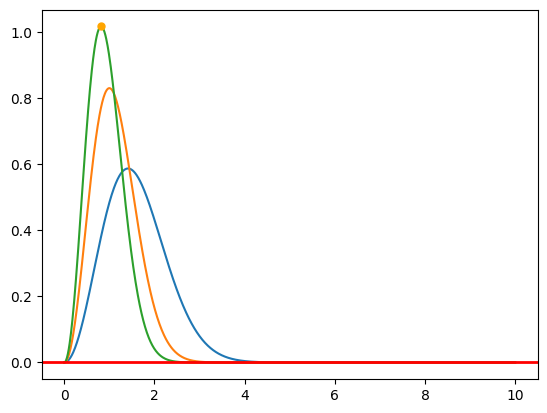

In [46]:
beta = 1
x = np.linspace(0, 10, 1000)
y = lambda x: np.sqrt(2/np.pi) * beta**(3/2) * x**2 * np.exp(-beta * x**2 / 2 )
plt.plot(x, y(x), label='y(x) при beta=1')

beta = 2
plt.plot(x, y(x), label='y(x) при beta=2')

beta = 3
plt.plot(x, y(x), label='y(x) при beta=3')

# Поиск локального максимума
maximum = optimize.fmin(lambda x: -y(x), 1.5, full_output=True, disp=False)
plt.plot(maximum[0][0], -maximum[1], 'o', color='orange', label='Локальный максимум', ms=5)
print(f"\nЛокальный максимум: ({maximum[0][0]:.4f}, {-maximum[1]:.4f})")

# Асимптота
plt.axhline(y=0, c='r', ls="-", lw=2, label='Асимптота')
print(f"Асимптота y = {0}")


plt.minorticks_on()
plt.grid(which='major', c='k', lw=1, alpha=0.3)
plt.grid(which='minor', c='k', ls=':', alpha=0.2)

plt.axvline(x=0, c='k', alpha=0.3)
plt.axhline(y=0, c='k', alpha=0.3)

plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.show()

### Упражнение 3

C:\Temp\ipykernel_11016\825130542.py:2: RuntimeWarning: invalid value encountered in sqrt
  y = lambda x: np.sqrt( (x**3 - 2*x**2) / (x - 3) )


Корень 1) х = 0.0, y = -0.0
Корень 2) х = 2.0, y = -0.0
Асимптота х = 3

Локальный максимум: (1.5000, 0.8660)

Локальный минимум: (4.0000, 5.6569)


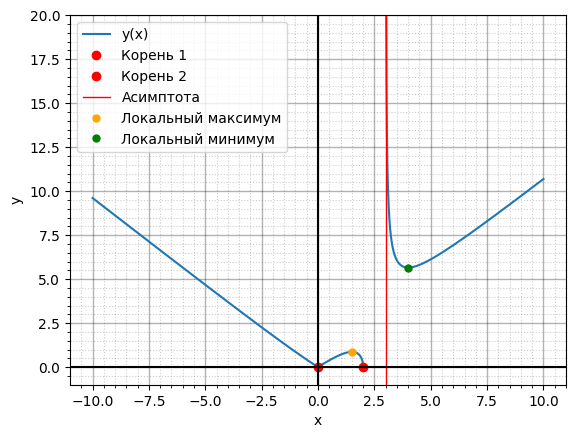

In [52]:
x = np.linspace(-10, 10, 10000)
y = lambda x: np.sqrt( (x**3 - 2*x**2) / (x - 3) )

plt.plot(x, y(x), label='y(x)')

numer = lambda x: (x**3 - 2*x**2)
denom = lambda x: (x - 3)

# Поиск корней
root = optimize.brentq(numer, 0, 0) 
plt.plot(root, y(root), 'ro', label='Корень 1')
print(f"Корень 1) х = {root}, y = {y(root)}")

root = optimize.brentq(numer, 2, 0) 
plt.plot(root, y(root), 'ro', label='Корень 2')
print(f"Корень 2) х = {root}, y = {y(root)}")

# Асимптота
plt.axvline(x=3, c='r', ls="-", lw=1, label='Асимптота')
print(f"Асимптота х = {3}")

# Поиск локального максимума
maximum = optimize.fmin(lambda x: -y(x), 1.5, full_output=True, disp=False)
plt.plot(maximum[0][0], -maximum[1], 'o', color='orange', label='Локальный максимум', ms=5)
print(f"\nЛокальный максимум: ({maximum[0][0]:.4f}, {-maximum[1]:.4f})")

# Поиск локального минимума
minimum = optimize.fmin(y, 4, full_output=True, disp=False)
plt.plot(minimum[0][0], minimum[1], 'go', label='Локальный минимум', ms=5)
print(f"\nЛокальный минимум: ({minimum[0][0]:.4f}, {minimum[1]:.4f})")

# Поиск точек перегиба
# x = sp.symbols('x')
# y = sp.sqrt( (x**3 - 2*x**2) / (x - 3) )
# der2 = sp.diff( sp.diff(y, x), x )
# sol = sp.solve(der2, x)
# print("\nКорни второй производной:")
# for i, s in enumerate(sol):
#     print(f"{i+1}) {sp.N(s)}")
    
# print("\nТочки перегиба: ")
# inflection_x = []
# inflection_y = []
# for i, s in enumerate(sol[:2]):
#     inflection_x.append( sp.N(s) )
#     inflection_y.append( y.subs(x, sp.N(s)) )
#     print(f"{i+1}) x = {inflection_x[-1]}, y = {inflection_y[-1]}")
# plt.plot(inflection_x, inflection_y, 'ro', label='Точки перегиба', ms=5)

plt.minorticks_on()
plt.grid(which='major', c='k', lw=1, alpha=0.3)
plt.grid(which='minor', c='k', ls=':', alpha=0.2)

plt.axvline(x=0, c='k')
plt.axhline(y=0, c='k')

plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.ylim(-1, 20)
plt.show()

### Упражнение 4

Локальный максимум: (0.1555, 0.8513)
Локальный максимум: (0.8221, 0.4370)
Локальный максимум: (1.4888, 0.2244)


Локальный минимум: (0.4888, -0.6099)
Локальный минимум: (1.1554, -0.3132)
Локальный минимум: (1.8221, -0.1608)


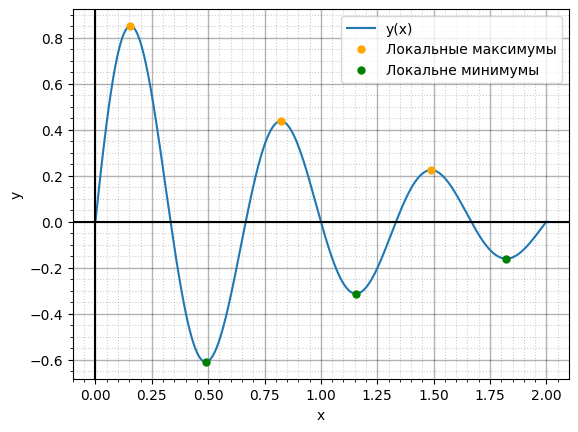

In [77]:
def get_min(x0, f, first=False):
    label = 'Локальне минимумы' if first else ""
    minimum = optimize.fmin(y, x0, full_output=True, disp=False)
    plt.plot(minimum[0][0], minimum[1], 'go', label=label, ms=5)
    print(f"Локальный минимум: ({minimum[0][0]:.4f}, {minimum[1]:.4f})")
    
def get_max(x0, f, first=False):
    label = 'Локальные максимумы' if first else ""
    maximum = optimize.fmin(lambda x: -y(x), x0, full_output=True, disp=False)
    plt.plot(maximum[0][0], -maximum[1], 'o', color='orange', label=label, ms=5)
    print(f"Локальный максимум: ({maximum[0][0]:.4f}, {-maximum[1]:.4f})")

x = np.linspace(0, 2, 10000)
y = lambda x: np.exp(-x) * np.sin(3*np.pi*x)

plt.plot(x, y(x), label='y(x)')

# Максимумы
get_max(0.1, y, first=True)
get_max(0.8, y)
get_max(1.5, y)
print('\n')

# Минимумы
get_min(0.5, y, first=True)
get_min(1.1, y)
get_min(1.8, y)

plt.minorticks_on()
plt.grid(which='major', c='k', lw=1, alpha=0.3)
plt.grid(which='minor', c='k', ls=':', alpha=0.2)

plt.axvline(x=0, c='k')
plt.axhline(y=0, c='k')

plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.show()

### Упражнение С1

NotImplementedError: multiple generators [x, tan(x/2)]
No algorithms are implemented to solve equation x**2*(1 - tan(x/2)**2)/(tan(x/2)**2 + 1) + 8*x*tan(x/2)/(tan(x/2)**2 + 1) - 2*(1 - tan(x/2)**2)/(tan(x/2)**2 + 1) - 2*tan(x/2)/(tan(x/2)**2 + 1)

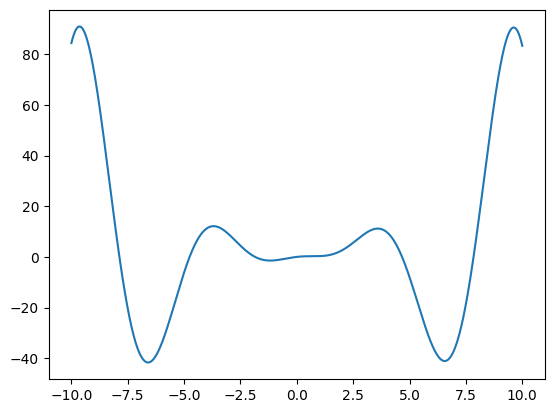

In [81]:
x = np.linspace(-10, 10, 1000)
y = lambda x: np.sin(x) - x**2 * np.cos(x)

plt.plot(x, y(x), label='y(x)')

# Поиск точек перегиба
x = sp.symbols('x')
y = sp.sin(x) - x**2 * sp.cos(x)
der2 = sp.diff( sp.diff(y, x), x )
sol = sp.solve(der2, x)
print("\nКорни второй производной:")
for i, s in enumerate(sol):
    print(f"{i+1}) {sp.N(s)}")
    
print("\nТочки перегиба: ")
inflection_x = []
inflection_y = []
for i, s in enumerate(sol[:2]):
    inflection_x.append( sp.N(s) )
    inflection_y.append( y.subs(x, sp.N(s)) )
    print(f"{i+1}) x = {inflection_x[-1]:.4f}, y = {inflection_y[-1]:.4f}")
plt.plot(inflection_x, inflection_y, 'ro', label='Точки перегиба', ms=5)

plt.minorticks_on()
plt.grid(which='major', c='k', lw=1, alpha=0.3)
plt.grid(which='minor', c='k', ls=':', alpha=0.2)

plt.axvline(x=0, c='k')
plt.axhline(y=0, c='k')

plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.show()

### Упражнение С2

Асимптота х = 1
Асимптота х = -1
Действительных корней нет

Локальный максимум: (0.0000, 0.3679)

Корни второй производной:
1) -0.759835685651593
2) 0.759835685651593
3) -0.759835685651593*I
4) 0.759835685651593*I

Точки перегиба: 
1) x = -0.7598, y = 0.0939
2) x = 0.7598, y = 0.0939


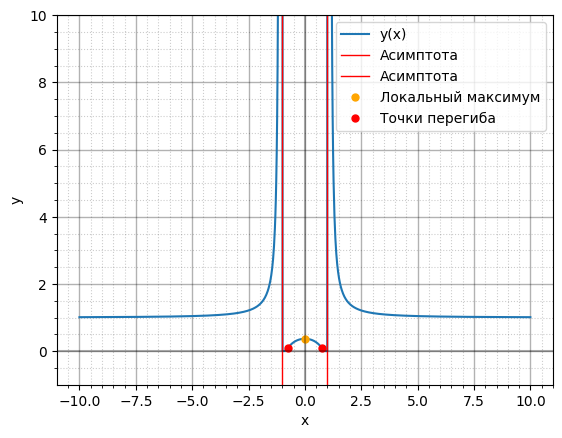

In [94]:
x = np.linspace(-10, 10, 1000)
y = lambda x: np.exp( 1/(x**2 - 1) )

plt.plot(x, y(x), label='y(x)')

# Асимптоты
plt.axvline(x=1, c='r', ls="-", lw=1, label='Асимптота')
print(f"Асимптота х = 1")

plt.axvline(x=-1, c='r', ls="-", lw=1, label='Асимптота')
print(f"Асимптота х = -1")

# Корни
print('Действительных корней нет')

# Поиск локального максимума
maximum = optimize.fmin(lambda x: -y(x), 0, full_output=True, disp=False)
plt.plot(maximum[0][0], -maximum[1], 'o', color='orange', label='Локальный максимум', ms=5)
print(f"\nЛокальный максимум: ({maximum[0][0]:.4f}, {-maximum[1]:.4f})")

# Поиск точек перегиба
x = sp.symbols('x')
y = sp.exp( 1/(x**2 - 1) )
der2 = sp.diff( sp.diff(y, x), x )
sol = sp.solve(der2, x)
print("\nКорни второй производной:")
for i, s in enumerate(sol):
    print(f"{i+1}) {sp.N(s)}")
    
print("\nТочки перегиба: ")
inflection_x = []
inflection_y = []
for i, s in enumerate(sol[:2]):
    inflection_x.append( sp.N(s) )
    inflection_y.append( y.subs(x, sp.N(s)) )
    print(f"{i+1}) x = {inflection_x[-1]:.4f}, y = {inflection_y[-1]:.4f}")
plt.plot(inflection_x, inflection_y, 'ro', label='Точки перегиба', ms=5)

plt.minorticks_on()
plt.grid(which='major', c='k', lw=1, alpha=0.3)
plt.grid(which='minor', c='k', ls=':', alpha=0.2)

plt.axvline(x=0, c='k', alpha=0.3)
plt.axhline(y=0, c='k', alpha=0.3)

plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.ylim(-1, 10)
plt.show()